In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
import math
warnings.filterwarnings("ignore")

In [3]:
wine_data = pd.read_csv('./winequality-red.csv')
display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Thông tin về các trường trong tập dữ liệu rượu vang

### 1. fixed acidity:
**Mô tả:** Độ axit cố định, chủ yếu là axit tartaric.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Độ axit cố định ảnh hưởng đến vị chua của rượu vang.

### 2. volatile acidity:
**Mô tả:** Độ axit bay hơi, chủ yếu là axit axetic.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Độ axit bay hơi cao có thể dẫn đến mùi vị không mong muốn, giống như giấm.

### 3. citric acid:
**Mô tả:** Hàm lượng axit citric.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Axit citric có thể thêm vị chua và tươi mát cho rượu vang.

### 4. residual sugar:
**Mô tả:** Lượng đường còn lại sau khi quá trình lên men kết thúc.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Đường dư có thể ảnh hưởng đến độ ngọt của rượu vang.

### 5. chlorides:
**Mô tả:** Hàm lượng muối.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Hàm lượng muối cao có thể ảnh hưởng đến vị mặn của rượu vang.

### 6. free sulfur dioxide:
**Mô tả:** Lượng sulfur dioxide tự do.  
**Đơn vị:** mg/dm³.  
**Ý nghĩa:** Sulfur dioxide tự do có tác dụng chống oxy hóa và kháng khuẩn.

### 7. total sulfur dioxide:
**Mô tả:** Tổng lượng sulfur dioxide (bao gồm cả sulfur dioxide tự do và liên kết).  
**Đơn vị:** mg/dm³.  
**Ý nghĩa:** Tổng lượng sulfur dioxide cao có thể ảnh hưởng đến mùi vị và gây dị ứng.

### 8. density:
**Mô tả:** Mật độ của rượu vang.  
**Đơn vị:** g/cm³.  
**Ý nghĩa:** Mật độ có thể liên quan đến hàm lượng đường và cồn trong rượu vang.

### 9. pH:
**Mô tả:** Độ pH của rượu vang.  
**Đơn vị:** Không có (thang đo pH).  
**Ý nghĩa:** Độ pH ảnh hưởng đến độ chua và khả năng bảo quản của rượu vang.

### 10. sulphates:
**Mô tả:** Hàm lượng sulfate.  
**Đơn vị:** g/dm³.  
**Ý nghĩa:** Sulfate có thể ảnh hưởng đến vị chát và khả năng bảo quản của rượu vang.

### 11. alcohol:
**Mô tả:** Hàm lượng cồn.  
**Đơn vị:** % vol.  
**Ý nghĩa:** Hàm lượng cồn ảnh hưởng đến độ mạnh và vị của rượu vang.

### 12. quality:
**Mô tả:** Điểm chất lượng của rượu vang.  
**Đơn vị:** Thang điểm từ 0 đến 10.  
**Ý nghĩa:** Điểm chất lượng được đánh giá bởi các chuyên gia dựa trên các yếu tố như hương vị, mùi, và cảm giác khi uống.

In [4]:
display(wine_data.describe())
wine_data['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
wine_data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

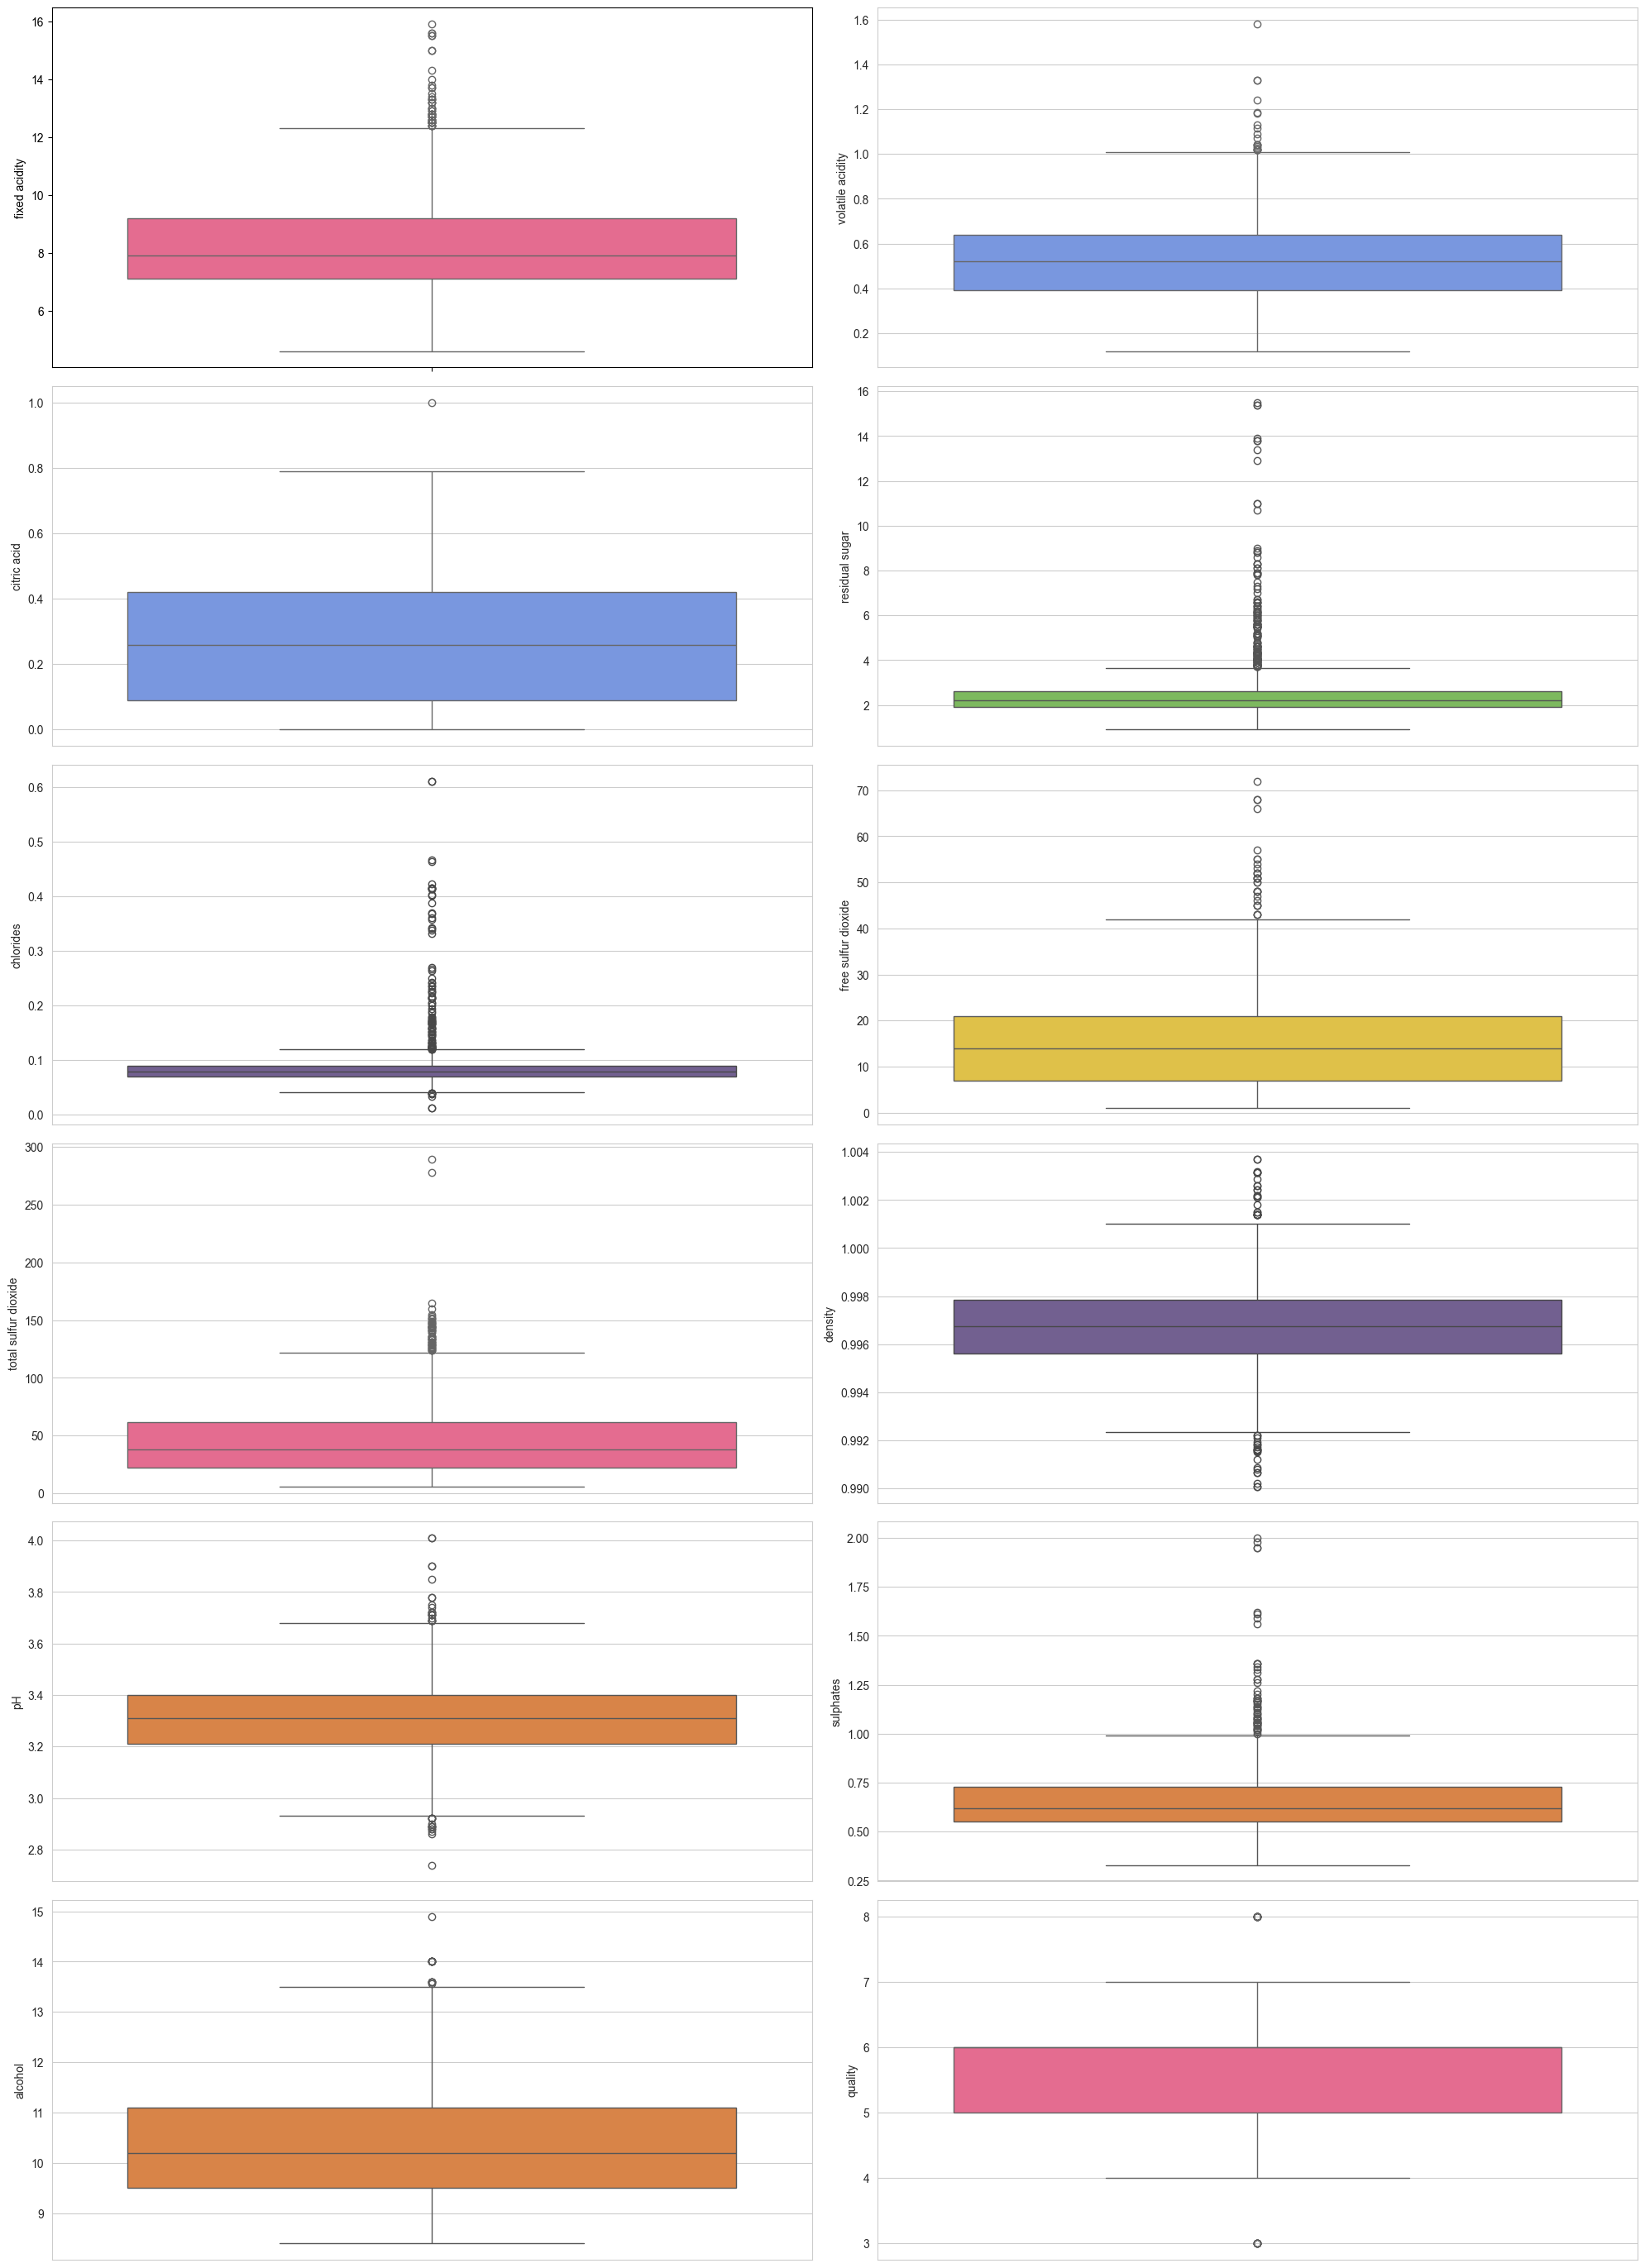

In [6]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']

wine_data.skew()

l = wine_data.columns.values
number_of_columns = math.ceil(wine_data.shape[1] / 6)
number_of_rows = int(math.ceil(len(l) / number_of_columns))
number_of_rows = int(len(l) - 1 / number_of_columns)
plt.figure(figsize=(10 * number_of_columns, 5 * number_of_rows))
for i in range(0, 12):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sb.set_style('whitegrid')
    sb.boxplot(wine_data[l[i]], color=colors[np.random.randint(6)], orient='v')
    plt.tight_layout()


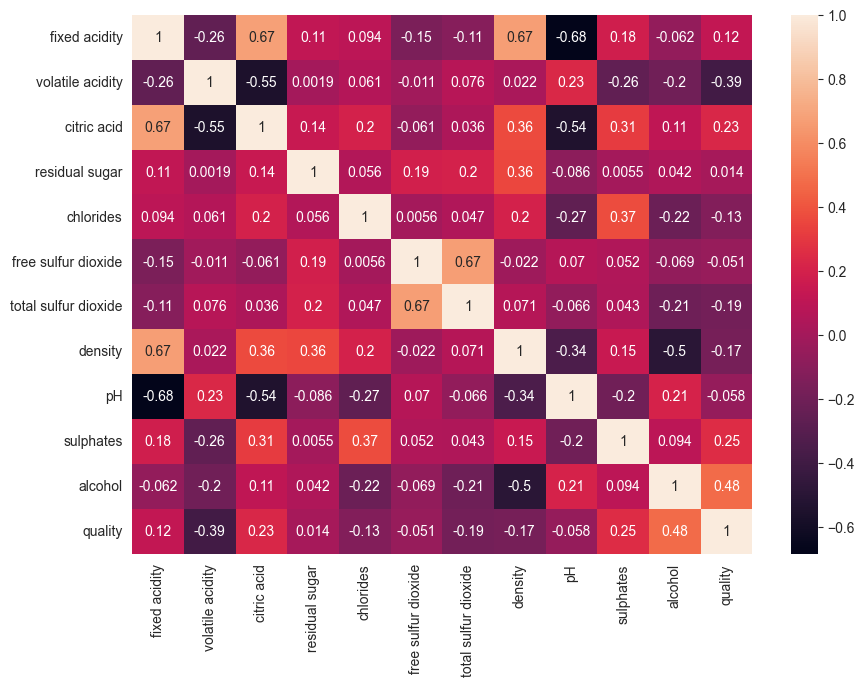

In [7]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(wine_data.corr() , annot = True , ax = ax)
plt.show()

<Axes: xlabel='fixed acidity', ylabel='density'>

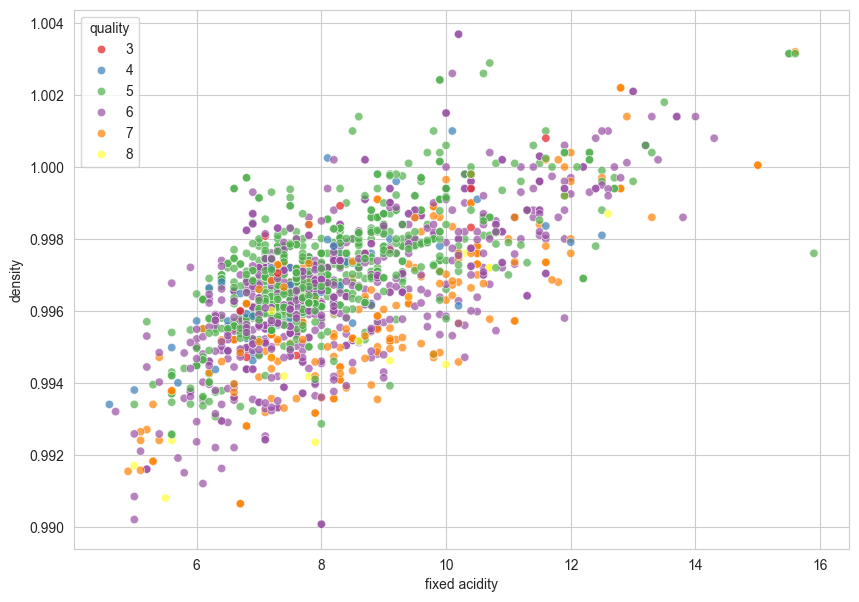

In [8]:
plt.figure(figsize = (10 , 7))
sb.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = wine_data, alpha = 0.7, palette = "Set1")

# Data preprocessing
## Features reduction
Using random forrest to analyse the feature importance

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_data)
model.fit(x, wine_data.quality)
display(model.feature_importances_)

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

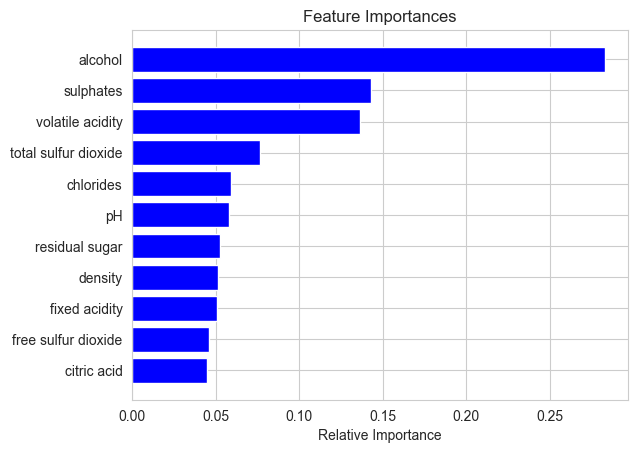

In [10]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [11]:
del x['fixed acidity']
del x['free sulfur dioxide']
del x['citric acid']

In [12]:
le = LabelEncoder()
y = le.fit_transform(wine_data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [13]:
from imblearn.over_sampling import SMOTE

strategy = {0:1700, 1:1700, 2:1700, 3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

In [14]:
x.shape


(10200, 8)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


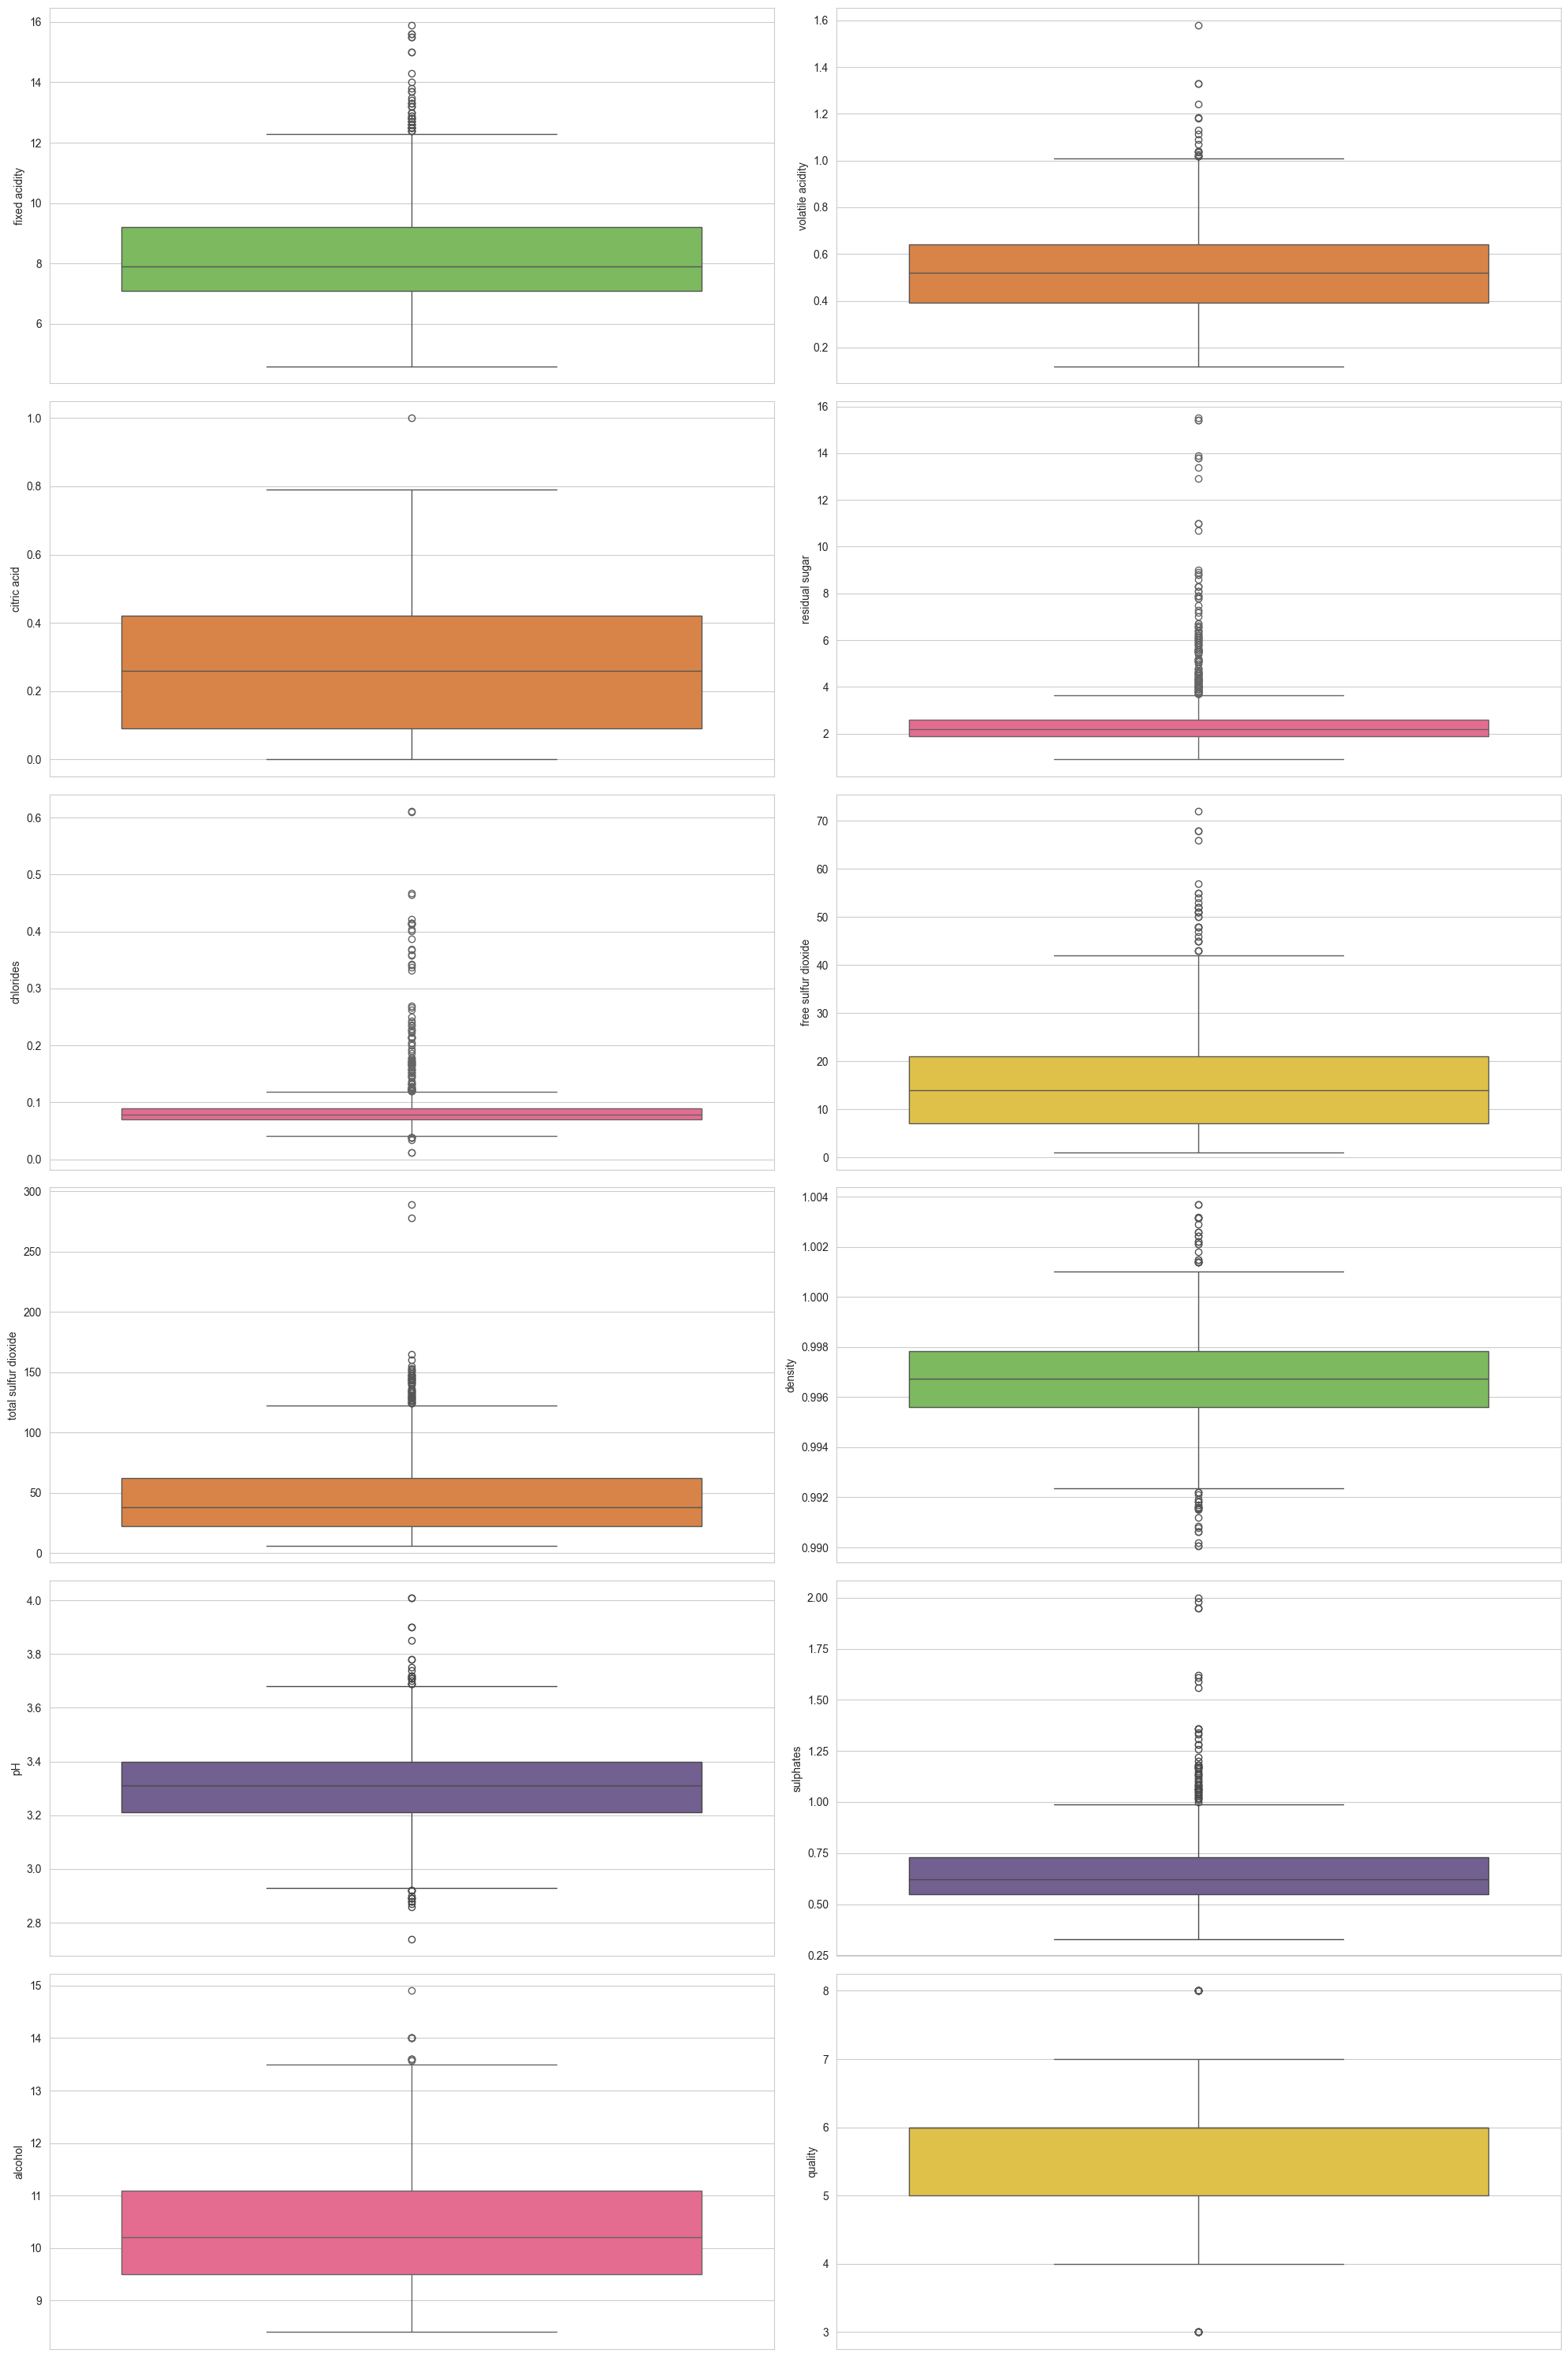

In [15]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']

# Tính độ lệch của các cột
print(wine_data.skew())

# Lấy tên các cột
l = wine_data.columns.values

# Tính số lượng cột và hàng
number_of_columns = math.ceil(wine_data.shape[1] / 6)
number_of_rows = math.ceil(len(l) / number_of_columns)

# Tạo hình vẽ với kích thước phù hợp
plt.figure(figsize=(10 * number_of_columns, 5 * number_of_rows))

# Vẽ biểu đồ boxplot cho từng cột
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sb.set_style('whitegrid')
    sb.boxplot(wine_data[l[i]], color=colors[np.random.randint(6)], orient='v')
    plt.tight_layout()

plt.show()

#### Understanding correlation between alcohol and wine quality

<Axes: xlabel='quality', ylabel='alcohol'>

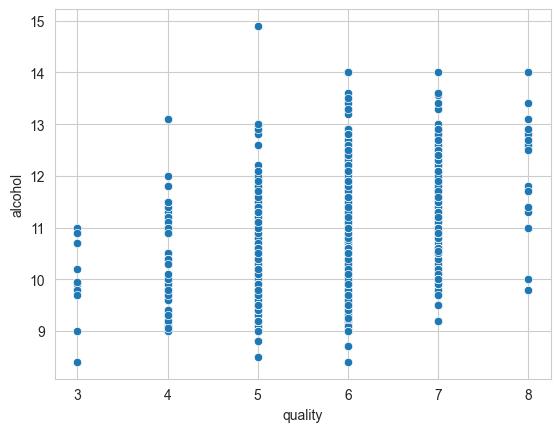

In [16]:
sb.scatterplot(x='quality', y='alcohol', data=wine_data)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [19]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape=(8,)))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334 (1.30 KB)

 Trainable params: 334 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

# NN (Neural Network)

In [21]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])


In [22]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Epoch 1/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2893 - loss: 1.7535 - val_accuracy: 0.5275 - val_loss: 1.2651
Epoch 2/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 1.2126 - val_accuracy: 0.5985 - val_loss: 1.0093
Epoch 3/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5897 - loss: 0.9944 - val_accuracy: 0.6426 - val_loss: 0.9333
Epoch 4/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6171 - loss: 0.9399 - val_accuracy: 0.6466 - val_loss: 0.8924
Epoch 5/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6474 - loss: 0.8895 - val_accuracy: 0.6613 - val_loss: 0.8562
Epoch 6/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6555 - loss: 0.8649 - val_accuracy: 0.6691 - val_loss: 0.8291
Epoch 7/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.8348 - val_accuracy: 0.6740 - val_loss: 0.8076
Epoch 8/150
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.8120 - val_accu

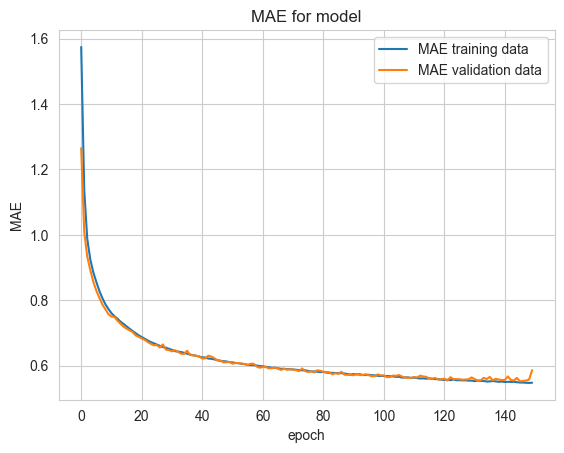

In [23]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

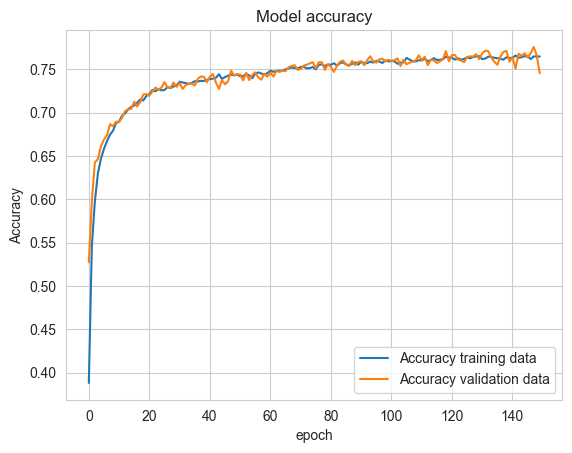

In [24]:
#  plotting the accuracy of neural network model over training epochs
# The overall purpose of this code is to visualize how the accuracy of the model changes over the training epochs for both the training and validation datasets.
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = ann.predict(x_test)
# Chuyển đổi y_test_cat và y_pred từ one-hot encoding về nhãn
y_test_labels = np.argmax(y_test_cat, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test_labels, y_pred_labels)
rmse = np.sqrt(mean_squared_error(y_test_labels, y_pred_labels))
r2 = r2_score(y_test_labels, y_pred_labels)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.28774509803921566
RMSE: 0.5986094998689324
R-squared: 0.8802561575848367


# Lasso

In [30]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

MAE: 1.4073888522835196
RMSE: 1.6005099342682239
R-squared: 0.14398233167293772


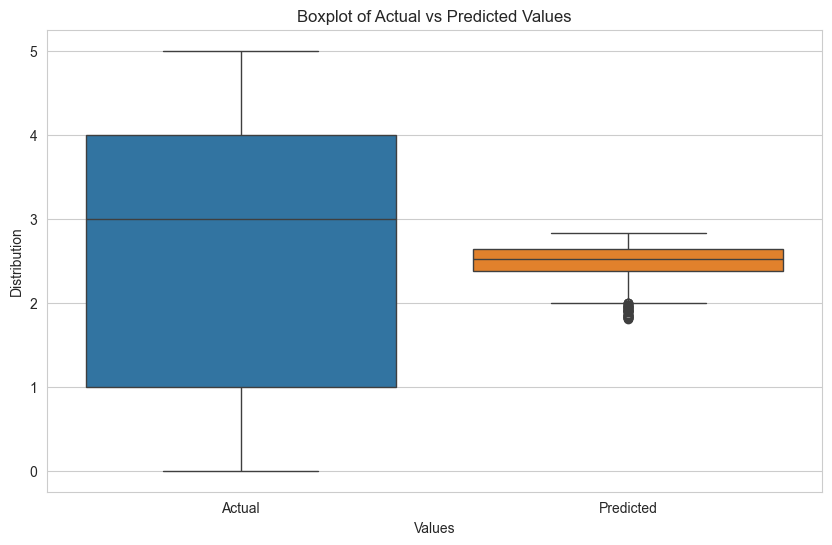

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lasso.predict(x_test)

# Tính toán các chỉ số
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Chuyển đổi y_test và y_pred thành mảng NumPy nếu cần
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Tạo DataFrame chứa giá trị thực tế và giá trị dự đoán
results = pd.DataFrame({'Actual': y_test_np.flatten(), 'Predicted': y_pred_np.flatten()})

# Vẽ biểu đồ boxplot so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
sb.boxplot(data=results)
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot of Actual vs Predicted Values')
plt.show()

# Linear Regression

In [25]:
%who

LabelEncoder	 RandomForestRegressor	 SMOTE	 StandardScaler	 ann	 ax	 colors	 features	 fig	 
history	 i	 importances	 indices	 l	 le	 math	 model	 np	 
number_of_columns	 number_of_rows	 oversample	 pd	 plt	 sb	 sc	 strategy	 tf	 
train_test_split	 warnings	 wd	 wine_data	 x	 x_test	 x_train	 y	 y_test	 
y_test_cat	 y_train	 y_train_cat	 
